/tmp/ipykernel_383848/1751731250.py:121: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  precision_patch = plt.Rectangle((0,0), 1, 1, color='gray', alpha=0.8, edgecolor='black', linewidth=0.5)
/tmp/ipykernel_383848/1751731250.py:122: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  recall_patch = plt.Rectangle((0,0), 1, 1, color='gray', hatch='///', alpha=0.8, edgecolor='black', linewidth=0.5)


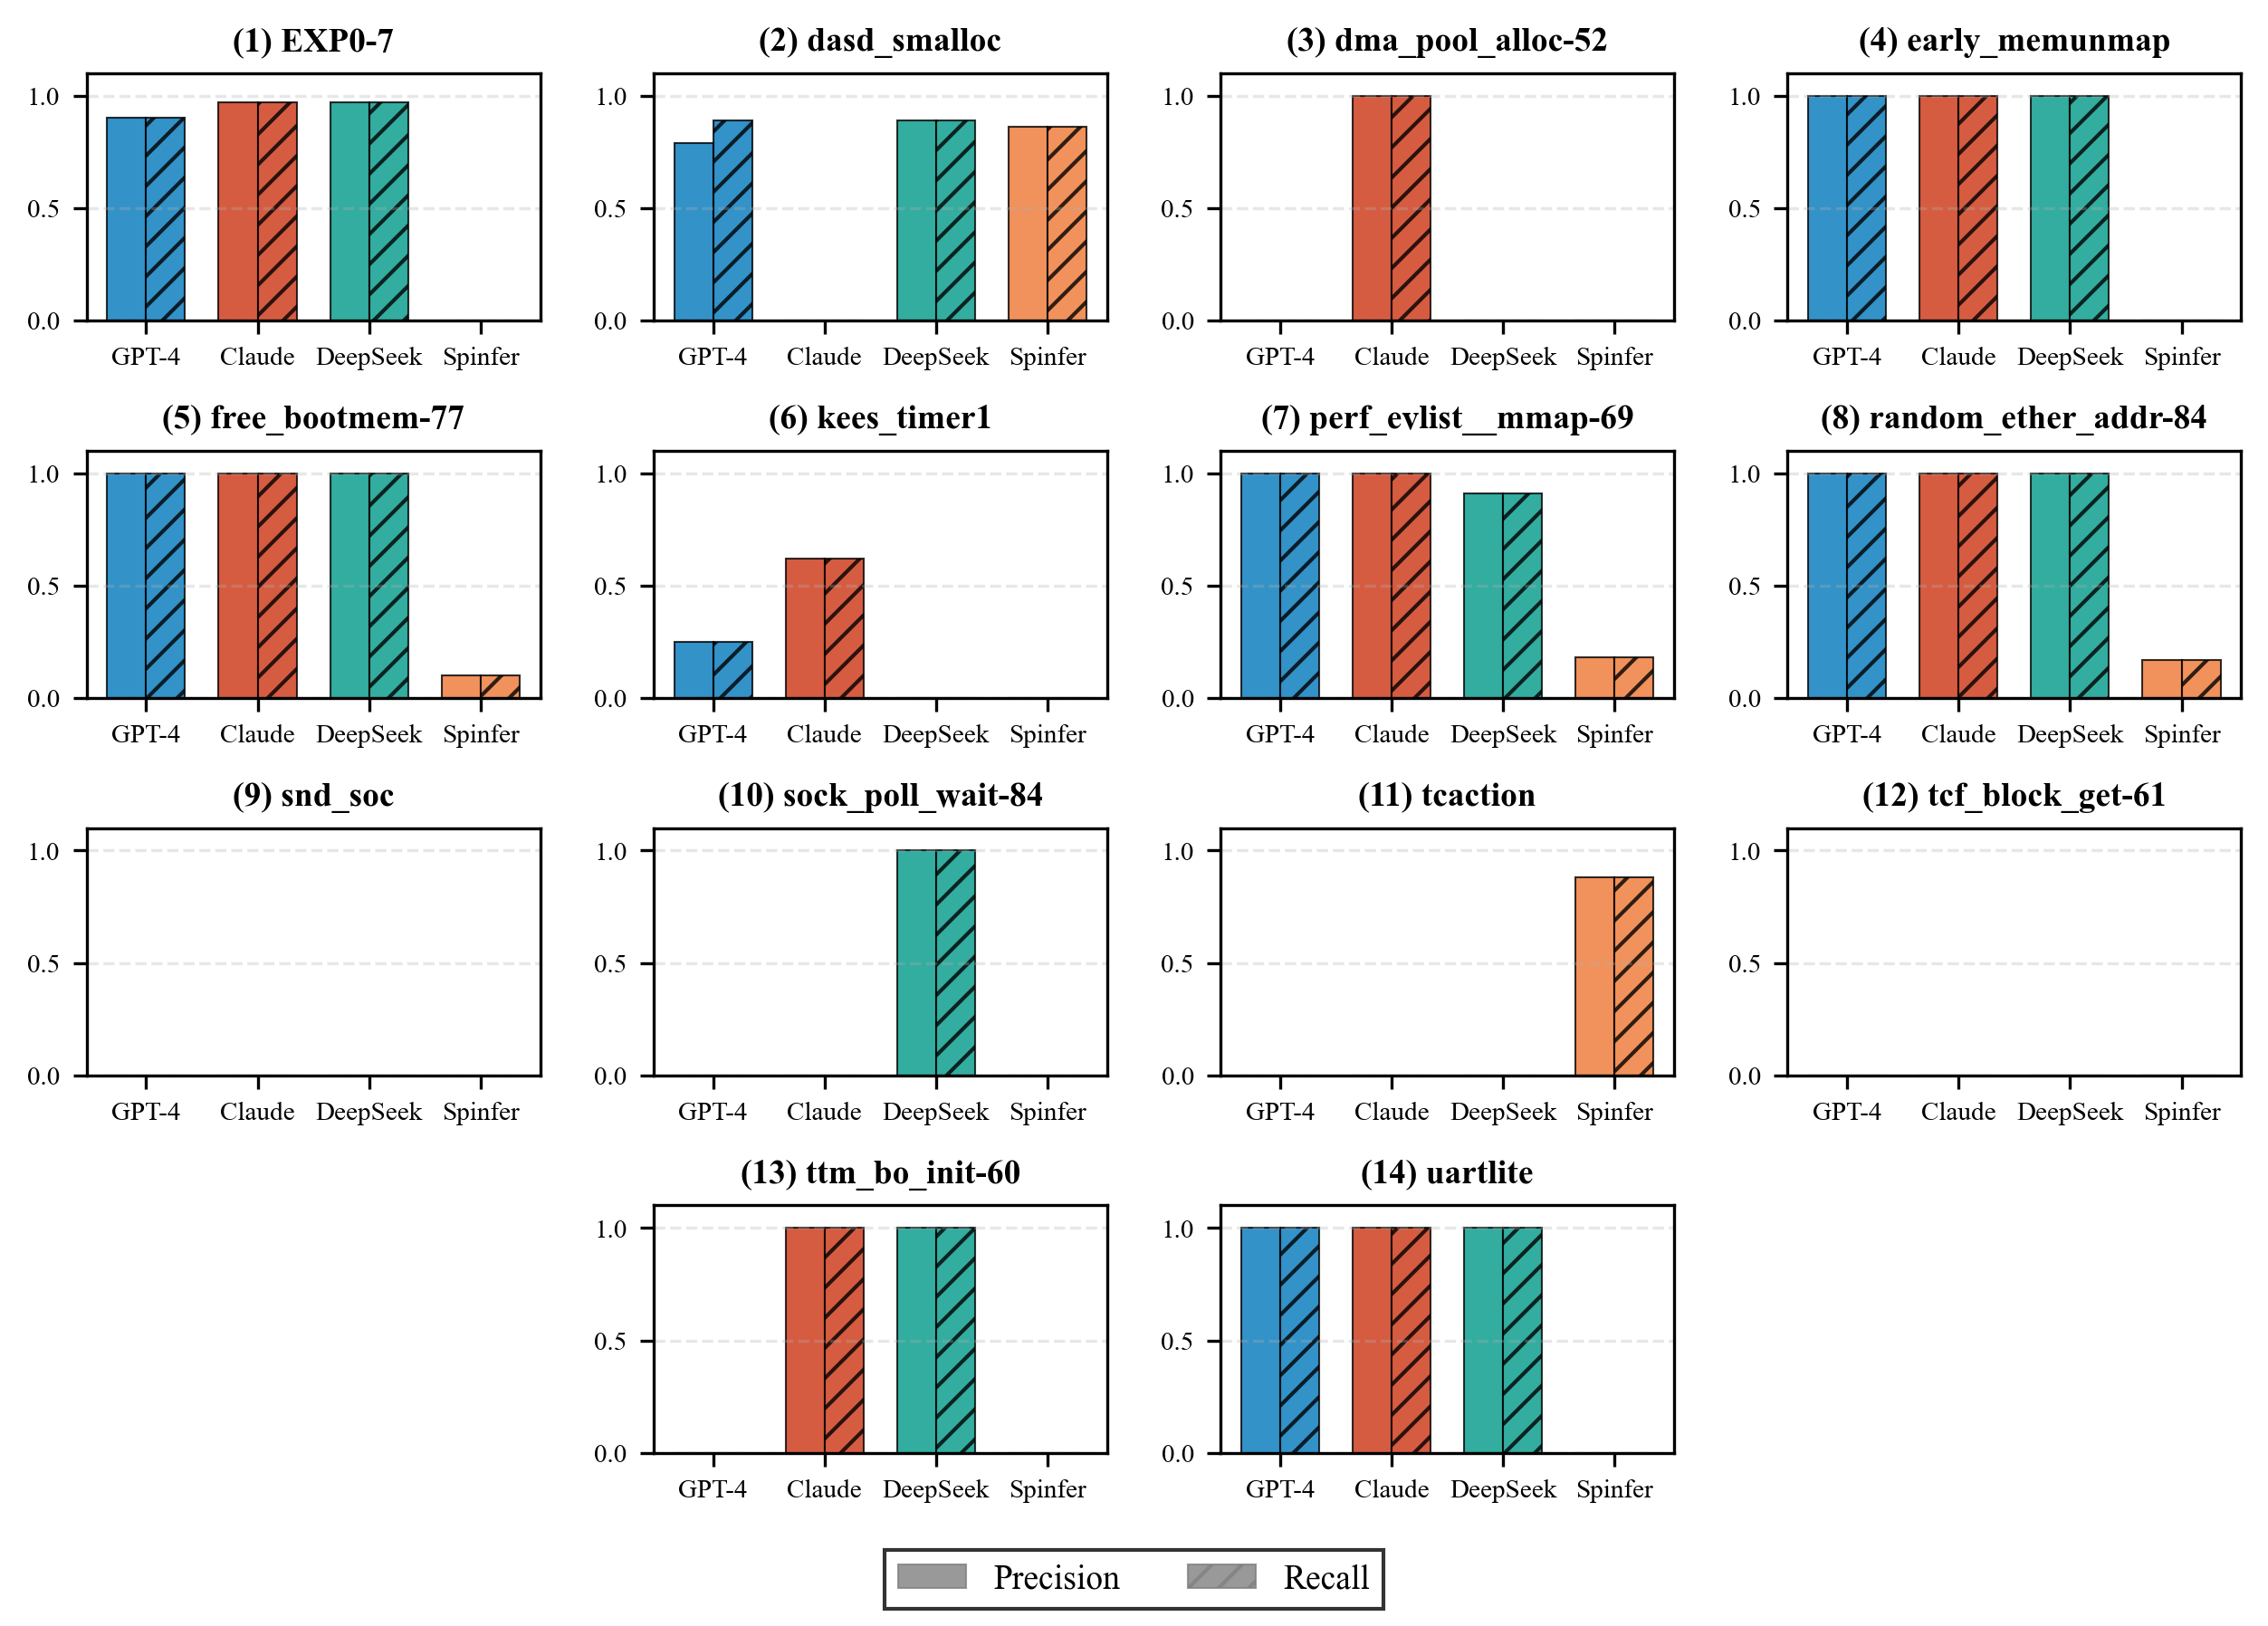

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set up the font to be Times New Roman (common in academic publications)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# Load data from CSV files
spinfer_res = "result_perdir_spinfer.csv"
gpt_res = "result_perdir_gpt.csv"
claude_res = "result_perdir_claude.csv"
deepseek_res = "result_perdir_deepseek.csv"

df_gpt4 = pd.read_csv(gpt_res)
df_claude = pd.read_csv(claude_res)
df_deepseek = pd.read_csv(deepseek_res)
df_spinfer = pd.read_csv(spinfer_res)

# Original palette
# model_colors = ['#0173B2', '#DE8F05', '#029E73', '#CC78BC']  # Blue, Orange, Green, Purple

# Paul Tol's bright scheme
# model_colors = ['#4477AA', '#EE6677', '#228833', '#CCBB44']  # Blue, Red, Green, Yellow

# ColorBrewer Set1 (first 4)
# model_colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3']  # Red, Blue, Green, Purple

# Vibrant palette (color-blind friendly)
model_colors = ['#0077BB', '#CC3311', '#009988', '#EE7733']  # Blue, Red, Teal, Orange

# IBM Design palette
# model_colors = ['#648FFF', '#785EF0', '#DC267F', '#FE6100']  # Blue, Purple, Magenta, Orange

# Set up the model names for x-axis and bar positions
model_names = ['GPT-4', 'Claude', 'DeepSeek', 'Spinfer']
n_models = len(model_names)
bar_width = 0.35  # Width of the bars

# Number of directories
n_dirs = len(df_gpt4['root'])

# Set figure size for the new layout
fig_width = 8.5  # inches (typical dissertation page width)
fig_height = 6  # inches (typical dissertation page height)

# Create a figure with a 4x4 grid
fig = plt.figure(figsize=(fig_width, fig_height), dpi=300)

# Define the grid layout - 4 columns
n_cols = 4

# Calculate the number of rows needed for the layout: 4-4-4-2
n_rows = 4

# Define the grid and create subplots
gs = fig.add_gridspec(n_rows, n_cols)

# Create axes for each subplot
axes = []

# First 3 rows with 4 plots each
for row in range(3):
    for col in range(n_cols):
        idx = row * n_cols + col
        if idx < n_dirs:
            ax = fig.add_subplot(gs[row, col])
            axes.append(ax)

# Last row with 2 plots in the middle
if n_dirs > 12:  # if we have plots for the last row
    remaining = min(2, n_dirs - 12)
    # Calculate the starting column to center the plots
    start_col = int((n_cols - remaining) / 2)
    for i in range(remaining):
        ax = fig.add_subplot(gs[3, start_col + i])
        axes.append(ax)

# Iterate through directories
for i, directory in enumerate(df_gpt4['root']):
    if i >= len(axes):
        break
        
    ax = axes[i]
    
    # Get precision and recall values
    precision_values = [
        df_gpt4.loc[df_gpt4['root'] == directory, 'precision'].values[0],
        df_claude.loc[df_claude['root'] == directory, 'precision'].values[0],
        df_deepseek.loc[df_deepseek['root'] == directory, 'precision'].values[0],
        df_spinfer.loc[df_spinfer['root'] == directory, 'precision'].values[0]
    ]
    
    recall_values = [
        df_gpt4.loc[df_gpt4['root'] == directory, 'recall'].values[0],
        df_claude.loc[df_claude['root'] == directory, 'recall'].values[0],
        df_deepseek.loc[df_deepseek['root'] == directory, 'recall'].values[0],
        df_spinfer.loc[df_spinfer['root'] == directory, 'recall'].values[0]
    ]
    
    # Set x positions for the bars
    x = np.arange(n_models)
    
    # Create grouped bars
    precision_bars = ax.bar(x - bar_width/2, precision_values, bar_width, label='Precision', 
                           color=[c for c in model_colors], edgecolor='black', linewidth=0.5, alpha=0.8)
    recall_bars = ax.bar(x + bar_width/2, recall_values, bar_width, label='Recall',
                        color=[c for c in model_colors], hatch='///', edgecolor='black', linewidth=0.5, alpha=0.8)
    
    # Configure axis
    ax.set_title(f"({i+1}) {directory}", fontsize=9, fontweight="bold")
    ax.set_ylim(0, 1.1)
    ax.set_xticks(x)
    ax.set_xticklabels(model_names, fontsize=7)
    ax.tick_params(axis='both', which='major', labelsize=7)
    ax.grid(True, axis='y', linestyle='--', alpha=0.3)

# Create pattern handles for precision vs recall
precision_patch = plt.Rectangle((0,0), 1, 1, color='gray', alpha=0.8, edgecolor='black', linewidth=0.5)
recall_patch = plt.Rectangle((0,0), 1, 1, color='gray', hatch='///', alpha=0.8, edgecolor='black', linewidth=0.5)

# Add legend for precision vs recall
fig.legend([precision_patch, recall_patch], ['Precision', 'Recall'], fontsize=9, frameon=True, 
           edgecolor='black', fancybox=False, loc='lower center', ncol=2)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.1)

# Save the figure with high quality
plt.savefig('precision_recall_by_directory.pdf', format='pdf', 
            bbox_inches='tight', dpi=300)

plt.show()